# LINEAR REGRESSION ASSIGNMENT

An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.

## Enjoy!!

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Code to avoid cell auto-scrolling

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [67]:
customers = pd.read_csv('Ecommerce_Customers.csv')
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [5]:
customers = pd.read_csv('/Users/jorgesalazar/Documents/BTS/CDA/Ecommerce_Customers.csv')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






In [8]:
customers.drop(columns=['Email','Address','Avatar','Avg. Session Length'], inplace=True)
customers.head()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,12.655651,39.577668,4.082621,587.951054
1,11.109461,37.268959,2.664034,392.204933
2,11.330278,37.110597,4.104543,487.547505
3,13.717514,36.721283,3.120179,581.852344
4,12.795189,37.536653,4.446308,599.406092


#### Check Missing values

In [9]:
customers.isnull().sum()

Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### Check disttribution of the target variable

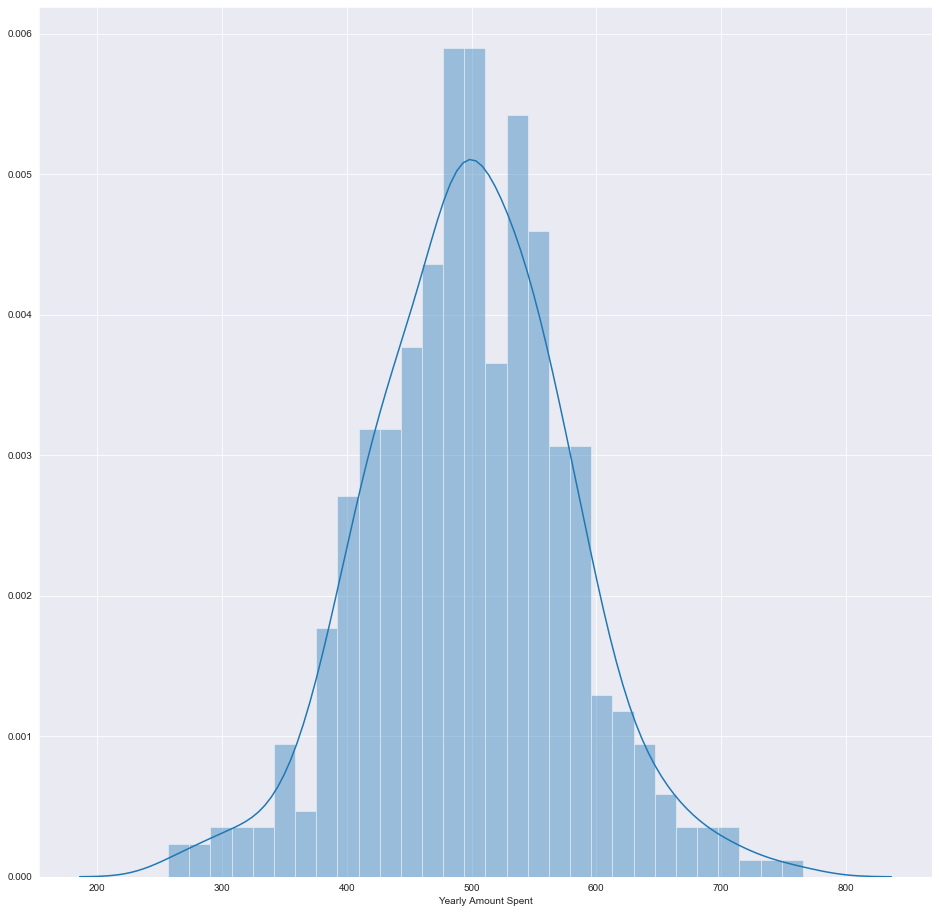

In [10]:
#The target variable will be yearly amount spent, since for the business it is important to 
#know in which feature (app or website) they are spending the most REGARDLESS of their time
#on its venture. Eventhough it is important to know time spent on each one, in this case, we
#are going to focus on yearly amount spent.

sns.set_style(style='darkgrid')
plt.figure(figsize=(16, 16))
sns.distplot(customers['Yearly Amount Spent'], bins=30)

#we can see that it has a normal distribution


#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

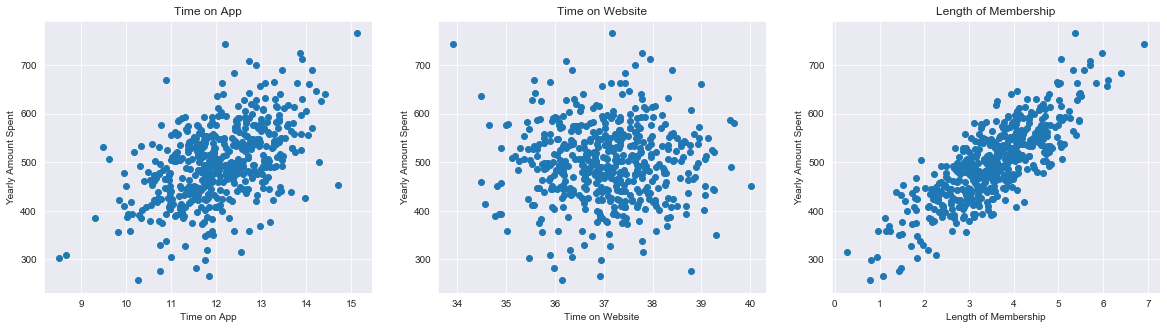

In [13]:
plt.figure(figsize=(20, 5))

independent = ['Time on App', 'Time on Website', 'Length of Membership']
target = customers['Yearly Amount Spent']

for i, col in enumerate(independent):
    plt.subplot(1, len(independent) , i+1)
    x = customers[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Yearly Amount Spent')

In [14]:
customers_corr = customers.corr()
customers_corr

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Time on App,1.000000,0.082388,0.029143,0.499328
Time on Website,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.499328,-0.002641,0.809084,1.000000


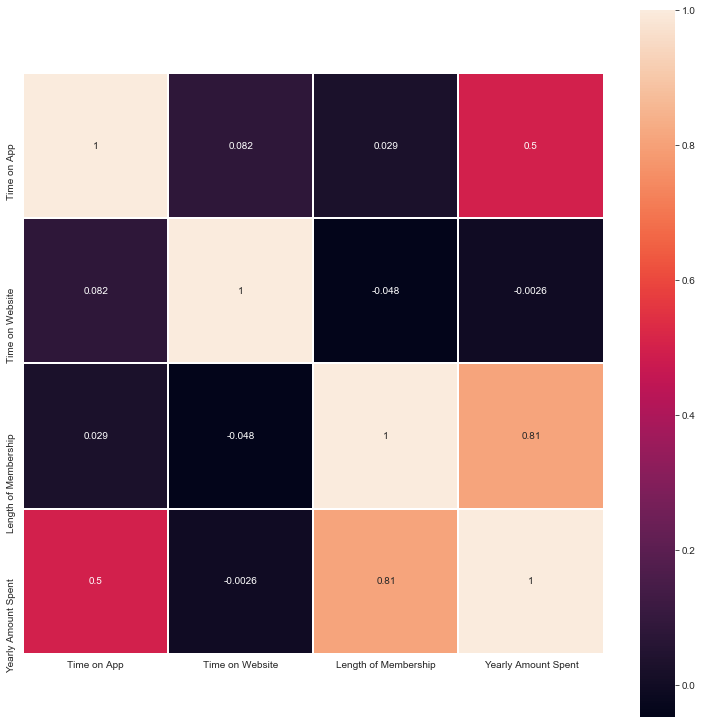

In [15]:
f, ax = plt.subplots(figsize=(13,13))
sns.heatmap(customers_corr, annot=True, square=True, linewidth=True)

In [ ]:
#We can see that there is a corrrelation between the length of the membership and the yearly
#amount money spent. Also there is kind of a relation between the time on the app and the target
#on the other side, there is no correlation at all between the time on the website and the 
#target



## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Simple linear regression

In [20]:
#We are going to start doing a simple linear regression with the time spent on the app

x = customers[['Time on App']]
y = customers['Yearly Amount Spent']


### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(375, 1)
(125, 1)
(375,)
(125,)


### Training of the model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print the coeficients of the model

In [23]:
lin_model.intercept_


6.009022243660013

In [25]:
coeff_df = pd.DataFrame(lin_model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Time on App,40.822231


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

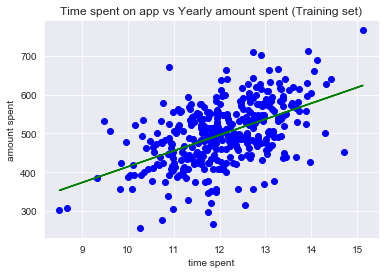

In [26]:
plt.scatter(X_train, Y_train, color = "blue")
plt.plot(X_train, lin_model.predict(X_train), color = "green")
plt.title("Time spent on app vs Yearly amount spent (Training set)")
plt.xlabel("time spent")
plt.ylabel("amount spent")
plt.show()

In [ ]:
#as we can see, the coefficient is positive with a value of 40, this means that the more time
#spent on the app, the more amount spent.

### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

In [27]:
predictions = lin_model.predict(X_test)

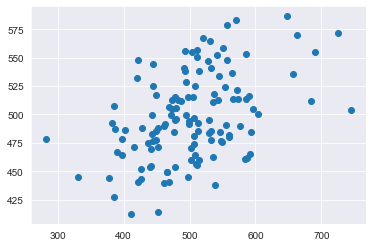

In [28]:
plt.scatter(Y_test,predictions)

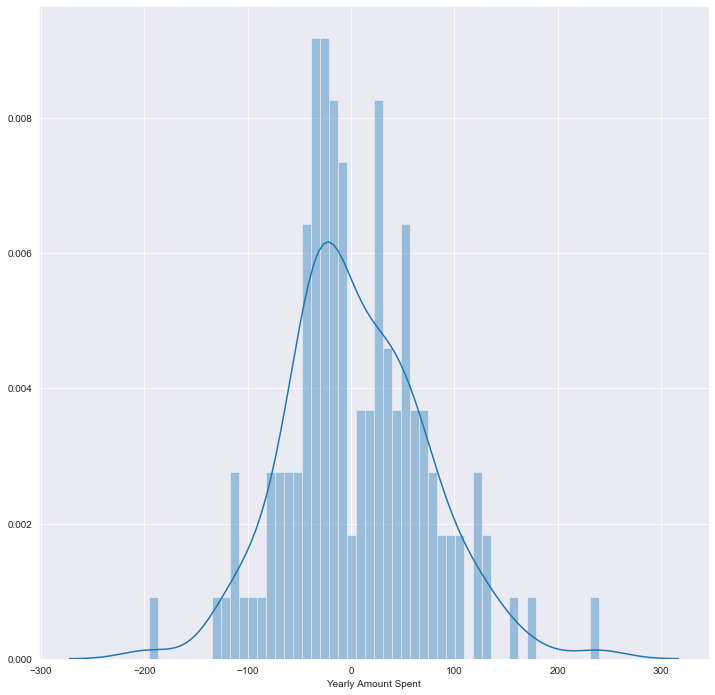

In [29]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(12, 12))
sns.distplot(Y_test-predictions, bins=50)

In [ ]:
#the residuals distribution follows a normal distribution a bit skewed to the left but overall
#it has a normal distribution with some outliers

In [30]:
from sklearn import metrics

y_train_predict = lin_model.predict(X_train)

print("The model performance for training set")

MAE_1 = metrics.mean_absolute_error(Y_train, y_train_predict, multioutput='uniform_average')
print('MAE:{0}'.format(MAE_1))
MSE_1 = metrics.mean_squared_error(Y_train, y_train_predict, multioutput='uniform_average')
print('MSE:{0}'.format(MSE_1))
RMSE_1 = MSE_1**0.5
print('RMSE:{0}'.format(RMSE_1))
R2_1 = metrics.r2_score(Y_train, y_train_predict)
print('R2 SCORE: {0}'.format(R2_1))


y_test_predict = lin_model.predict(X_test)

print("The model performance for testing set")

MAE_2 = metrics.mean_absolute_error(Y_test, y_test_predict, multioutput='uniform_average')
print('MAE:{0}'.format(MAE_2))
MSE_2 = metrics.mean_squared_error(Y_test, y_test_predict, multioutput='uniform_average')
print('MSE:{0}'.format(MSE_2))
RMSE_2 = MSE_2**0.5
print('RMSE:{0}'.format(RMSE_2))
R2_2 = metrics.r2_score(Y_test, y_test_predict)
print('R2 SCORE: {0}'.format(R2_2))

The model performance for training set
MAE:54.473391155057705
MSE:4781.579340544587
RMSE:69.14896485519206
R2 SCORE: 0.26377184625079364
The model performance for testing set
MAE:52.85745926417563
MSE:4517.4548005623665
RMSE:67.21201381124037
R2 SCORE: 0.19460615741124732


In [ ]:
#we can see from the training set scores that our predicting model is not ideal because the r2
#score is very low since the training, which explains why for the testing it is also very slow
#we can change some parameters from the validation set so have a better training.

## Multivariate Model

In [31]:
x = customers[['Time on App','Length of Membership']]
Y = customers['Yearly Amount Spent']

### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


### Training of the model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print the coeficients of the model

In [39]:
coeff_df = pd.DataFrame(lin_model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Time on App,39.000513
Length of Membership,63.989974


In [40]:
lin_model.intercept_

-196.34692764796057

In [50]:
predictions = lin_model.predict(X_test)

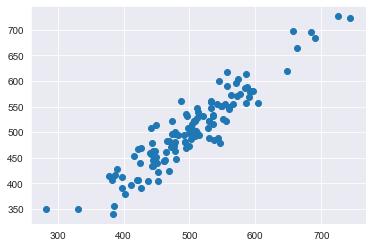

In [51]:
plt.scatter(Y_test,predictions)

### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

In [49]:
from sklearn import metrics

y_train_predict = lin_model.predict(X_train)

print("The model performance for training set")

MAE_1 = metrics.mean_absolute_error(Y_train, y_train_predict, multioutput='uniform_average')
print('MAE:{0}'.format(MAE_1))
MSE_1 = metrics.mean_squared_error(Y_train, y_train_predict, multioutput='uniform_average')
print('MSE:{0}'.format(MSE_1))
RMSE_1 = MSE_1**0.5
print('RMSE:{0}'.format(RMSE_1))
R2_1 = metrics.r2_score(Y_train, y_train_predict)
print('R2 SCORE: {0}'.format(R2_1))


y_test_predict = lin_model.predict(X_test)

print("The model performance for testing set")

MAE_2 = metrics.mean_absolute_error(Y_test, y_test_predict, multioutput='uniform_average')
print('MAE:{0}'.format(MAE_2))
MSE_2 = metrics.mean_squared_error(Y_test, y_test_predict, multioutput='uniform_average')
print('MSE:{0}'.format(MSE_2))
RMSE_2 = MSE_2**0.5
print('RMSE:{0}'.format(RMSE_2))
R2_2 = metrics.r2_score(Y_test, y_test_predict)
print('R2 SCORE: {0}'.format(R2_2))

The model performance for training set
MAE:22.42705179175358
MSE:748.8827562119649
RMSE:27.365722285588678
R2 SCORE: 0.8846932091442077
The model performance for testing set
MAE:21.6315912465458
MSE:746.4380901002304
RMSE:27.321019199514325
R2 SCORE: 0.8669213820212224


#### Which model has better performance?

Write your answer here:






In [ ]:
#the second model can predict more accurate because the length of the membership also influences
#on the yearly amount spent, we can see that comparing our r2 scores, there is more precision
#when adding the two variables to predict the model.

**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

Write your answer here:








In [ ]:
#if we look at the scatter plot using only the time spent on app we can see that there is not 
#a good predictive behavioural model, which I would not suggest to stay or focuse only on the
#time spent on App. But once we added the another variable of length of membership, we noticed
#that the prediction models behave a lot better. This means that in order to try to improve
#their business they should focus first on the time spent on app because there is no correlaiton
#on the time spent on the website and the amount spent. But when doing the multivariable predictions
#we can see that they should not only focus on the time on app but also on the length of membership